## US Housing Market Analysis 

#### By: Rena Han & Cole Yang

**Overview**

For our Data Bootcamp project, we decided to study how the domestic housing market has evolved over the course of the last 19 years. Specifically, we wanted to take a look at changes in the demographic and economic factors related to housing price, such as the change in population and income per capita. To best analyze these relationships, we decided to consolidate the data on a county-specific level, which we believe will offer sufficient detail. 

Because this analysis was only conducted on the US housing market, its findings are not applicable to the housing markets in other international countries. Furthermore, because there are many other factors that influence housing price beyond just population and income per capita (quality of education, weather, etc.), this analysis is far from conclusive. Nonetheless, we hope that our project can bring to life some interesting insights.  

**Data**

The key elements of this project are the use of the Bureau of Economic Analysis' API and Zillow's housing data (coming from Zillow Research). These two sources will provide access to the above mentioned demographic and economic factors at the correct geographic level between the years of 1998 and 2017. 

From BEA
- regional accounts data on a county level (population and income per capita) 
 
From Zillow
- housing price data for single-family homes (in excel format) 

### Setup

In the following steps, we import the necessary modules

In [2]:
import pandas as pd 
import requests 
import numpy as np 
import matplotlib.pyplot as plt 
import weightedcalcs as wc
import datetime as dt
import seaborn as sns

%matplotlib inline

### Grabbing the data

Here we use a BEA API key (from class) to grab income per capita and population for all years between 1998 and 2017

In [3]:
BEA_ID = "6BF79D8C-8042-4196-88DC-0E0C55B0C3B6" 

my_key = "https://APPS.BEA.gov/api/data?&UserID=" + BEA_ID 

data_set =  "&method=GetData&" + "datasetname=RegionalIncome&"

table_and_line_income = "TableName=CA1&LineCode=3&" 

table_and_line_population = "TableName=CA1&LineCode=2&" 

year = "Year=" + "1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017" + "&" 

location = "GeoFips=COUNTY&" 

form = "ResultFormat=JSON" 

### Creating the income dataframe

In [4]:
API_URL = my_key + data_set + table_and_line_income + year + location + form

r = requests.get(API_URL)

df_income = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

In [5]:
df_income.drop(['CL_UNIT', 'Code',"NoteRef", "UNIT_MULT"], axis=1, inplace = True)

df_income.rename(columns={"DataValue":"IncomePerCapita"}, inplace=True)

In [6]:
df_income.head(10)

,IncomePerCapita,GeoFips,GeoName,TimePeriod
0,"19,621",00000,United States,1990
1,"20,030",00000,United States,1991
2,"21,090",00000,United States,1992
3,"21,733",00000,United States,1993
4,"22,575",00000,United States,1994
5,"23,607",00000,United States,1995
6,"24,771",00000,United States,1996
7,"25,993",00000,United States,1997
8,"27,557",00000,United States,1998
9,"28,675",00000,United States,1999


### Creating the population dataframe

In [7]:
API_URL = my_key + data_set + table_and_line_population + year + location + form

r = requests.get(API_URL)

population = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

population.drop(['CL_UNIT', 'Code',"NoteRef", "UNIT_MULT", "GeoName"], axis=1, inplace = True)

population.rename(columns={"DataValue":"Pop"}, inplace=True)

In [8]:
population.head(10)

,Pop,GeoFips,TimePeriod
0,"249,622,814",00000,1990
1,"252,980,941",00000,1991
2,"256,514,224",00000,1992
3,"259,918,588",00000,1993
4,"263,125,821",00000,1994
5,"266,278,393",00000,1995
6,"269,394,284",00000,1996
7,"272,646,925",00000,1997
8,"275,854,104",00000,1998
9,"279,040,168",00000,1999


### Merging the two dataframes 

In [9]:
pop_income = pd.merge(population, df_income,   
                 how='left',      
                 on=['GeoFips',"TimePeriod"],       
                 indicator=True)  

We set the index to GeoFips so that the data will be easier to work with later on

In [10]:
pop_income.set_index("GeoFips", inplace = True)

Some basic information about the merged pop_income df

In [11]:
pop_income.shape

(89544, 5)

In [12]:
pop_income.dtypes

Pop                  object
TimePeriod           object
IncomePerCapita      object
GeoName              object
_merge             category
dtype: object

In [13]:
pop_income.head(10)

,Pop,TimePeriod,IncomePerCapita,GeoName,_merge
GeoFips,,,,,
00000,"249,622,814",1990,"19,621",United States,both
00000,"252,980,941",1991,"20,030",United States,both
00000,"256,514,224",1992,"21,090",United States,both
00000,"259,918,588",1993,"21,733",United States,both
00000,"263,125,821",1994,"22,575",United States,both
00000,"266,278,393",1995,"23,607",United States,both
00000,"269,394,284",1996,"24,771",United States,both
00000,"272,646,925",1997,"25,993",United States,both
00000,"275,854,104",1998,"27,557",United States,both


In [14]:
pop_income.tail(10)

,Pop,TimePeriod,IncomePerCapita,GeoName,_merge
GeoFips,,,,,
98000,"51,608,614",2008,"43,214",Far West,both
98000,"52,167,532",2009,"41,298",Far West,both
98000,"52,686,778",2010,"42,636",Far West,both
98000,"53,176,406",2011,"44,966",Far West,both
98000,"53,679,832",2012,"47,451",Far West,both
98000,"54,161,802",2013,"47,819",Far West,both
98000,"54,695,081",2014,"50,787",Far West,both
98000,"55,249,155",2015,"53,911",Far West,both
98000,"55,772,858",2016,"55,550",Far West,both


Converting to excel so we can doublecheck our changes

In [15]:
pop_income.to_excel("Population Income.xlsx") 

### Bringing in the Zillow dataset

In [16]:
file = "https://github.com/zcy204/data_bootcamp_final_project/raw/master/zillowdata.xlsx" # from Zillow Home Value Index 
zillow = pd.read_excel(file)

In [17]:
zillow.drop(['RegionID',"State", "NEW STATE CODE", "MunicipalCodeFIPS", "NEW FIPS", "SizeRank"], axis=1, inplace = True)

In [18]:
zillow.head(10)

,RegionName,StateCodeFIPS,GEOFIPS,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2017
0,Autauga County,1,1001,109900.0,110300.0,110600.0,110800.0,110900.0,111000.0,111000.0,...,144300,144400,144300,144000,143300,142800,143000,142700,142700,143333.333333
1,Baldwin County,1,1003,101500.0,102400.0,102800.0,102900.0,102600.0,102300.0,102000.0,...,180700,180300,179500,179000,179100,179500,179200,178900,178200,179808.333333
2,Blount County,1,1009,79200.0,80600.0,81600.0,82600.0,83500.0,84200.0,84900.0,...,131300,131800,132200,132500,132200,131900,132000,132100,132000,131541.666667
3,Cherokee County,1,1019,62100.0,62900.0,63600.0,64300.0,64800.0,65400.0,65800.0,...,105000,105600,105900,105300,104700,104100,103400,102500,102200,104000.000000
4,Chilton County,1,1021,82600.0,83000.0,83300.0,83600.0,83900.0,84200.0,84400.0,...,111600,112600,113200,113500,113900,114400,114400,114300,114200,112758.333333
5,Coffee County,1,1031,79600.0,78900.0,78400.0,77900.0,77700.0,77600.0,77700.0,...,106000,106400,106700,107500,108400,109400,110100,110300,109900,107558.333333
6,Colbert County,1,1033,40100.0,40000.0,40000.0,40000.0,39800.0,39500.0,39100.0,...,94400,94900,94900,94900,95000,95300,95200,95000,95000,94541.666667
7,De Kalb County,1,1049,56600.0,56300.0,56300.0,56700.0,57300.0,58300.0,59400.0,...,89200,89900,90200,90500,90900,90900,90900,90900,90900,90041.666667
8,Elmore County,1,1051,112100.0,112900.0,113500.0,114100.0,114500.0,114700.0,114800.0,...,153100,153100,153300,153500,153300,153100,152900,152700,153100,152858.333333
9,Etowah County,1,1055,65200.0,65700.0,65900.0,65800.0,65600.0,65200.0,64900.0,...,91100,91300,91000,90400,90300,90500,90800,91000,90500,90683.333333


### Cleaning the data

Because values in the GEOFIPS column are stored as integers instead of strings, many of them are missing 0s. For example, Autauga County should have a GEOFIPS of 01001, but because its an integer, the 0 dissapears and the GEOFIPS is incorrectly shown as 1001. Below, we wrote a for loop in order to fix that issue and update the GEOFIPS column with the correct values. 

In [19]:
values = zillow['GEOFIPS'].tolist()

In [20]:
newval = []
for val in values:
    if len(str(val)) != 5:
        val = '0' + str(val)
        newval.append(val)
    else:
        val = val
        newval.append(val)
    

In [21]:
zillow['GEOFIPS'] = newval

In [22]:
zillow['GEOFIPS'].head()

0    01001
1    01003
2    01009
3    01019
4    01021
Name: GEOFIPS, dtype: object

Sorting values by StateCodeFIPS and RegionName allows us to first order the data alphabetically by state and then again alphabetically by county name within each state. For example, Alabama has StateCodeFips 1 so after sorting, all of the Alabama counties show up first, with counties like Autauga, Baldwin, Cherokee, etc. also ranked accordingly. 

In [23]:
zillow.sort_values(by=['StateCodeFIPS', 'RegionName'], inplace = True) #trial and error 

In [24]:
zillow.drop(['StateCodeFIPS'], axis = 1, inplace = True )

In [25]:
zillow.columns

Index(['RegionName',    'GEOFIPS',    '1998-01',    '1998-02',    '1998-03',
          '1998-04',    '1998-05',    '1998-06',    '1998-07',    '1998-08',
       ...
          '2017-04',    '2017-05',    '2017-06',    '2017-07',    '2017-08',
          '2017-09',    '2017-10',    '2017-11',    '2017-12',         2017],
      dtype='object', length=262)

In [26]:
newcol = ['RegionName','GEOFIPS',1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [27]:
zillow = zillow[newcol]

In [28]:
zillow.head(10)

,RegionName,GEOFIPS,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Autauga County,01001,110558.333333,111250.000000,115125.000000,109325.000000,118983.333333,122391.666667,128516.666667,133633.333333,...,145258.333333,144341.666667,142366.666667,136208.333333,133766.666667,133691.666667,139225.000000,136991.666667,138950.000000,143333.333333
1,Baldwin County,01003,102433.333333,112983.333333,128941.666667,116558.333333,141233.333333,132908.333333,145566.666667,168383.333333,...,189783.333333,170208.333333,157800.000000,148683.333333,153800.000000,156766.666667,163416.666667,172216.666667,179191.666667,179808.333333
2,Blount County,01009,84300.000000,92058.333333,94000.000000,91233.333333,102700.000000,105533.333333,109033.333333,119783.333333,...,130791.666667,128533.333333,110083.333333,110466.666667,119991.666667,118716.666667,119150.000000,122291.666667,127150.000000,131541.666667
3,Cherokee County,01019,65075.000000,67283.333333,71141.666667,69208.333333,77825.000000,79550.000000,81883.333333,84075.000000,...,102583.333333,96250.000000,94366.666667,89591.666667,82991.666667,83083.333333,89591.666667,95650.000000,97166.666667,104000.000000
4,Chilton County,01021,84183.333333,87950.000000,90741.666667,84783.333333,93691.666667,98908.333333,100375.000000,88366.666667,...,97033.333333,98808.333333,92766.666667,92891.666667,96733.333333,103141.666667,102283.333333,103658.333333,106008.333333,112758.333333
5,Coffee County,01031,78391.666667,79166.666667,80216.666667,76516.666667,85458.333333,87508.333333,90675.000000,96041.666667,...,111683.333333,119516.666667,112941.666667,108283.333333,119341.666667,108958.333333,103133.333333,103508.333333,104725.000000,107558.333333
6,Colbert County,01033,38958.333333,39550.000000,45375.000000,48808.333333,60750.000000,73991.666667,80858.333333,86950.000000,...,92791.666667,90725.000000,83266.666667,86550.000000,87150.000000,86408.333333,84983.333333,88283.333333,90825.000000,94541.666667
7,De Kalb County,01049,59508.333333,64316.666667,67250.000000,64291.666667,71625.000000,73725.000000,75625.000000,74300.000000,...,91391.666667,89375.000000,85900.000000,86300.000000,83525.000000,80050.000000,80550.000000,81991.666667,86016.666667,90041.666667
8,Elmore County,01051,114058.333333,116125.000000,121291.666667,116050.000000,148950.000000,137016.666667,136883.333333,159050.000000,...,185091.666667,170616.666667,175791.666667,168150.000000,163050.000000,163575.000000,152091.666667,152333.333333,150641.666667,152858.333333
9,Etowah County,01055,64750.000000,61183.333333,65616.666667,67508.333333,75483.333333,79608.333333,81975.000000,87016.666667,...,103283.333333,96266.666667,92750.000000,83425.000000,84475.000000,83475.000000,83783.333333,84691.666667,85991.666667,90683.333333


### Preparing for the pop_income and Zillow merge

The Zillow data came in a format that was very wide, which was going to be an issue if we needed to merge it with the pop_income dataframe, which was long. Transposing didn't work, so instead we used the melt function. Our two identifier variables were Regionname and GEOFIPS, which we kept set (id_vars). 

In [29]:
zillowdf = zillow.melt(id_vars = ['RegionName','GEOFIPS'])

In [30]:
zillowdf.columns = ['RegionName', 'GeoFips', 'TimePeriod','Median_Housing_Price']

In [31]:
zillowdf.set_index('GeoFips', inplace = True)

In [32]:
zillowdf = zillowdf.reset_index()

In [33]:
zillowdf['Median_Housing_Price'] = np.round(zillowdf['Median_Housing_Price'], decimals=2)

In [34]:
zillowdf.head(10)

,GeoFips,RegionName,TimePeriod,Median_Housing_Price
0,01001,Autauga County,1998,110558.33
1,01003,Baldwin County,1998,102433.33
2,01009,Blount County,1998,84300.00
3,01019,Cherokee County,1998,65075.00
4,01021,Chilton County,1998,84183.33
5,01031,Coffee County,1998,78391.67
6,01033,Colbert County,1998,38958.33
7,01049,De Kalb County,1998,59508.33
8,01051,Elmore County,1998,114058.33
9,01055,Etowah County,1998,64750.00


In [35]:
zillowdf.tail(10)

,GeoFips,RegionName,TimePeriod,Median_Housing_Price
38210,56023,Lincoln County,2017,210408.33
38211,56025,Natrona County,2017,199000.00
38212,56029,Park County,2017,233491.67
38213,56031,Platte County,2017,178666.67
38214,56033,Sheridan County,2017,227908.33
38215,56037,Sweetwater County,2017,221233.33
38216,56039,Teton County,2017,762708.33
38217,56041,Uinta County,2017,203333.33
38218,56043,Washakie County,2017,169325.00
38219,56045,Weston County,2017,138875.00


### Preparing the pop_income dataframe for merging

In [36]:
pop_income = pop_income.reset_index()

In [37]:
pop_income = pop_income.drop(['_merge'], axis = 1)

In [104]:
pop_income.head(10)

,GeoFips,Pop,TimePeriod,IncomePerCapita
GeoName,,,,
"Autauga, AL",01001,"34,353",1990,"15,482"
"Autauga, AL",01001,"35,010",1991,"16,417"
"Autauga, AL",01001,"35,985",1992,"17,063"
"Autauga, AL",01001,"36,953",1993,"17,700"
"Autauga, AL",01001,"38,186",1994,"18,683"
"Autauga, AL",01001,"39,112",1995,"19,350"
"Autauga, AL",01001,"40,207",1996,"20,155"
"Autauga, AL",01001,"41,238",1997,"21,076"
"Autauga, AL",01001,"42,106",1998,"22,073"


In [39]:
US = pop_income.set_index('GeoFips').loc['00000']

In [40]:
updateinc = []
for val in US['IncomePerCapita']:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        updateinc.append(val)
    else:
        updateinc.append(0)

In [41]:
newpop = []
for val in US['Pop']:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        newpop.append(val)
    else:
        newpop.append(0)

In [42]:
US['Pop'] = newpop
US['IncomePerCapita'] = updateinc

In [43]:
US['Pop'] = US['Pop'].astype(int) / 1000000

In [44]:
US['Pop'] = np.round(US['Pop'], decimals=2)

In [45]:
US.set_index('TimePeriod', inplace = True)

In [46]:
US # this gives us the country's population and IncomePC over the last 27 years 

,Pop,IncomePerCapita,GeoName
TimePeriod,,,
1990,249.62,19621,United States
1991,252.98,20030,United States
1992,256.51,21090,United States
1993,259.92,21733,United States
1994,263.13,22575,United States
1995,266.28,23607,United States
1996,269.39,24771,United States
1997,272.65,25993,United States
1998,275.85,27557,United States


### US Income

The plot below shows the nationwide trend in income per capita growth over the period 1990-2017. Besides a few hiccups, income per capita has been gradually increasing YoY, reaching approximately $55,000 by 2017. 

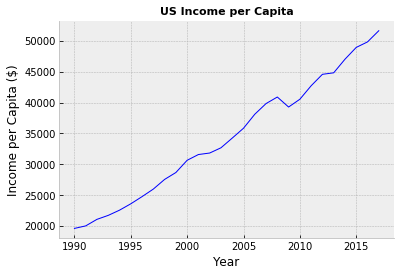

In [105]:
fig, ax = plt.subplots()

plt.style.use('bmh')

ax.plot(US.index.astype(int), US.IncomePerCapita, color = 'b', linewidth = '1')
ax.set_title("US Income per Capita", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Income per Capita ($)")
ax.set_xlabel("Year")

ax.set_xticks(np.arange(1990,2017,5))

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

### US Population
The time series line plot belows simply shows the United States population and its steady growth over the period 1990-2017. The US Population is now approximately 325 million people as of 2017/18. 

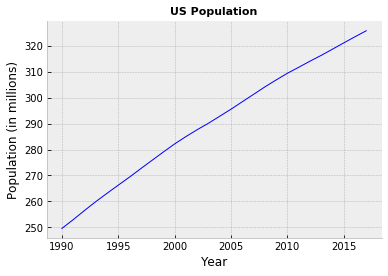

In [48]:
fig, ax = plt.subplots()

ax.plot(US.index.astype(int), US.Pop, color = 'b', linewidth = '1')
ax.set_title("US Population", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Population (in millions)")
ax.set_xlabel("Year")

ax.set_xticks(np.arange(1990,2017,5))


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

Below, we drop all the observations not directly related to a US county. This includes rows with data about the US as a whole, or regions like the Far West. 

In [49]:
pop_income = pop_income.set_index(['GeoName'])

In [50]:
pop_income = pop_income.drop(['United States',
'New England',
'Mideast',
'Great Lakes',
'Plains',
'Southeast',
'Southwest',
'Rocky Mountain',
'Far West', 
'Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming'])


In [103]:
pop_income.reset_index().head(10)

,GeoName,GeoFips,Pop,TimePeriod,IncomePerCapita
0,"Autauga, AL",01001,"34,353",1990,"15,482"
1,"Autauga, AL",01001,"35,010",1991,"16,417"
2,"Autauga, AL",01001,"35,985",1992,"17,063"
3,"Autauga, AL",01001,"36,953",1993,"17,700"
4,"Autauga, AL",01001,"38,186",1994,"18,683"
5,"Autauga, AL",01001,"39,112",1995,"19,350"
6,"Autauga, AL",01001,"40,207",1996,"20,155"
7,"Autauga, AL",01001,"41,238",1997,"21,076"
8,"Autauga, AL",01001,"42,106",1998,"22,073"
9,"Autauga, AL",01001,"42,963",1999,"22,948"


Here we change the type of TimePeriod and GeoFips in both pop_income and zillowdf into integer and string, respectively.

In [52]:
pop_income['TimePeriod'] = pop_income['TimePeriod'].astype(int)
pop_income['GeoFips'] = pop_income['GeoFips'].astype(str)

In [53]:
zillowdf['TimePeriod'] = zillowdf['TimePeriod'].astype(int)
zillowdf['GeoFips'] = zillowdf['GeoFips'].astype(str)

### Merging the BEA pop_income and Zillow zillow_df dataframes

In [54]:
combo = pd.merge(pop_income, zillowdf,
                 on=['TimePeriod', 'GeoFips'],      
                 how = 'inner',   
                 indicator=True)  

In [55]:

combo = combo.dropna(axis = "rows") # removing the rows with NaN (no data available), some counties with 0 still remain

In [56]:
combo = combo[(combo['Median_Housing_Price'] != 0)]

In [57]:
combo.set_index(['GeoFips'], inplace = True)

In [58]:
combo = combo.drop(['_merge'], axis = 1)

Now, we have to update the income and population data to remove commas. This will make it easier to manipulate.

In [59]:
income = combo['IncomePerCapita'].tolist()
pop = combo['Pop'].tolist()

In [99]:
updateinc = []
for val in income:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        updateinc.append(val)
    else:
        updateinc.append(0)
    

In [100]:
newpop = []
for val in pop:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        newpop.append(val)
    else:
        newpop.append(0)


In [62]:
combo['IncomePerCapita'] = updateinc
combo['Pop'] = newpop

### Housing Affordability Index

We then calculated our Housing Affordability Index, which was based off of a similar formula from the Federal Reserve Bank of San Francisco (https://www.frbsf.org/education/publications/doctor-econ/2003/december/housing-affordability-index/). It's calculated as income per capita / median housing price - the higher the index value, the more 'affordable' the typical home is in that specific county. 

In [63]:
#combo['IncomePerCapita'] = pop_income['IncomePerCapita'].astype(int)
#combo['Avg Housing Price'] = pop_income['Avg Housing Pric'].astype(float)

combo['Housing_Affordability_Index'] = ((combo['IncomePerCapita'].astype(int) / combo['Median_Housing_Price'].astype(float)) * 100)


In [64]:
combo['Housing_Affordability_Index'] = np.round(combo['Housing_Affordability_Index'], decimals=2)

In [65]:
combo = combo[['RegionName','TimePeriod', 'Pop', 'IncomePerCapita', 'Median_Housing_Price', 'Housing_Affordability_Index']]


### Combined (combo) dataframe

Combo presents a big picture overview for all counties in the US (for all years 1998-2017) and the corresponding statistics

In [66]:
combo.head()

,RegionName,TimePeriod,Pop,IncomePerCapita,Median_Housing_Price,Housing_Affordability_Index
GeoFips,,,,,,
01001,Autauga County,1998,42106,22073,110558.33,19.97
01001,Autauga County,1999,42963,22948,111250.00,20.63
01001,Autauga County,2000,44021,23699,115125.00,20.59
01001,Autauga County,2001,44889,24682,109325.00,22.58
01001,Autauga County,2002,45909,24991,118983.33,21.00


In [67]:
combo['Pop_Change'] = combo['Pop'].pct_change()
combo['Change_in_Housing_Price'] = combo['Median_Housing_Price'].pct_change()
combo['Change_in_IncomePerCapita'] = combo['IncomePerCapita'].pct_change()

In [68]:
combo = combo[['RegionName','TimePeriod','Pop', 'Pop_Change', 'IncomePerCapita', 'Change_in_IncomePerCapita', 'Median_Housing_Price', 'Change_in_Housing_Price', 'Housing_Affordability_Index']]


In [69]:
combo.head()

,RegionName,TimePeriod,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
GeoFips,,,,,,,,,
01001,Autauga County,1998,42106,NaN,22073,NaN,110558.33,NaN,19.97
01001,Autauga County,1999,42963,0.020353,22948,0.039641,111250.00,0.006256,20.63
01001,Autauga County,2000,44021,0.024626,23699,0.032726,115125.00,0.034831,20.59
01001,Autauga County,2001,44889,0.019718,24682,0.041479,109325.00,-0.050380,22.58
01001,Autauga County,2002,45909,0.022723,24991,0.012519,118983.33,0.088345,21.00


Converting to excel so that we can doublecheck our changes.

In [70]:
combo.to_excel("Combo.xlsx") # converting to excel so we can doublecheck our changes

### Case Studies 

From combo, we can now pull in specific counties to further analyze and visualize. Instead of randomly selecting counties to work with, we decided to focus on three counties - the District of Columbia, El Paso County in Colorado, and Philadelphia County in Pennsylvania. We decided on these three cases by looking at the Housing Affordability Index in the combo dataframe and finding the counties behind the median (50th percentile), 10th percentile, and 90th percentile values (by cross referencing the HAI value with the corresponding GeoFips value and Population Income data).  

In [71]:
combo['Housing_Affordability_Index'].quantile(0.5) # District of Columbia  

28.2

In [72]:
combo['Housing_Affordability_Index'].quantile(0.10) # El Paso County (Colorado)

16.79

In [73]:
combo['Housing_Affordability_Index'].quantile(0.90) # Philadelphia County (Pennsylvania)

45.28

But before we get into the county cases, let's start with some simple big-picture visualization of US housing.

## Data Visualization

### US Final Combination

USfincombo consolidates US-related data on Income per Capita, Median Housing Price, and the Housing Affordability Inde for the years 1998-2017. We grouped by Time Period and used the .mean() function to reach an average annual value for the above metrics for each year. 

In [74]:
fincombo = combo.groupby(['TimePeriod']).mean()

In [75]:
fincombo

,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
TimePeriod,,,,,,,
1998,151721.177207,3.087506,23460.142142,-0.438736,92587.095711,-0.316586,28.775385
1999,153613.639950,0.011814,24299.634314,0.034764,98366.864903,0.062849,27.961127
2000,155487.721979,0.011541,25701.674389,0.055603,105051.450683,0.058257,27.955554
2001,157204.631183,0.008102,26794.034440,0.043924,102757.112254,-0.028539,30.122686
2002,158807.139011,inf,27143.541014,inf,118211.104214,0.144338,26.807032
2003,159586.186567,0.010349,27937.487562,0.027825,125811.251082,0.054320,26.394652
2004,160928.310174,0.013320,29301.782258,0.047923,137475.434349,0.080894,25.888852
2005,161391.179487,0.031554,30506.477411,0.034679,152346.138645,0.092619,25.071758
2006,161618.512063,0.019438,32167.052473,0.047141,165417.239644,0.074473,25.026647


In [76]:
fincombo = fincombo.drop(['Pop','Pop_Change','Change_in_IncomePerCapita','Change_in_Housing_Price'], axis = 1)

In [77]:
fincombo

,IncomePerCapita,Median_Housing_Price,Housing_Affordability_Index
TimePeriod,,,
1998,23460.142142,92587.095711,28.775385
1999,24299.634314,98366.864903,27.961127
2000,25701.674389,105051.450683,27.955554
2001,26794.034440,102757.112254,30.122686
2002,27143.541014,118211.104214,26.807032
2003,27937.487562,125811.251082,26.394652
2004,29301.782258,137475.434349,25.888852
2005,30506.477411,152346.138645,25.071758
2006,32167.052473,165417.239644,25.026647


### US IncomePC vs. Median Housing Price

In the scatter plot below, you can see that across the entire US, there does seem to be a linear relationship between income per capita and the median housing price. When US income per capita rises, whether due to strong economic growth or other factors, the associated median housing price typically also rises. Since 1998, the median home price has also increased from under 100,000 dollars to almost 170,000 dollars as of 2017. This increase has been accompanied by an 86% jump in the US income per capita over the same time frame, representative of the proportional relationship between these two variables. This association makes sense, as when times are good and people are doing well, income per capita will increase. With higher incomes, they may look to invest or put that money towards real estate, contributing to rising housing prices.  

/Users/cole/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


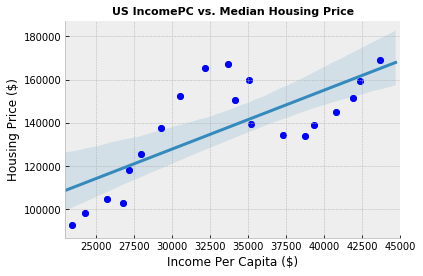

In [78]:
fig, ax = plt.subplots()

sns.regplot(fincombo.IncomePerCapita, fincombo.Median_Housing_Price)

ax.scatter(fincombo.IncomePerCapita, fincombo.Median_Housing_Price, color = 'b', linewidth = '1')
ax.set_title("US IncomePC vs. Median Housing Price", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Housing Price ($)")
ax.set_xlabel("Income Per Capita ($)")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim(23000,45000)
#ax.set_ylim(-0.8,0.8)

plt.show()


### Housing Affordability Index Time-Series
Below, we graphed the Housing Affordability Index for the entire US over the period 1998-2017. From the line plot, we can tell that the US HAI has been relatively positive, peaking around 2012-2014 at a value of about 35. In the years leading up to the subprime mortgage bubble and the financial crisis of 2008 (which is demarcated with a dotted black line), it's clear that the Affordability Index took a hit, with consecutive years of decreases. As the US economy has recovered since 08 however, the Affordability Index has moved higher, up until the last couple of years where once again, housing affordability has declined. 

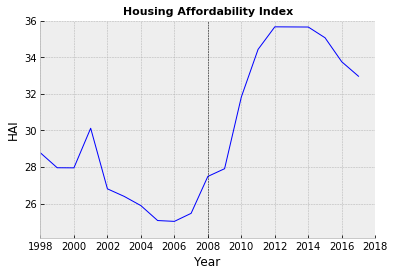

In [79]:
fig, ax = plt.subplots()

ax.plot(fincombo.index, fincombo.Housing_Affordability_Index, color = 'b', linewidth = '1')
ax.set_title("Housing Affordability Index", fontsize = 11, fontweight = "bold")
ax.set_ylabel("HAI")
ax.set_xlabel("Year")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xticks(np.arange(1998,2019,2))

plt.axvline(x=2008, linestyle = '--', color = 'black', linewidth = '0.5')


ax.set_xlim(1998,2018)
ax.set_ylim(24.1,36)

plt.show()


Now we'll begin looking at the same metrics for specific US counties:

### 50th percentile (median) of Housing Affordability Index

First, we tested the District of Columbia, which was the US county with the median Housing Affordability Index value (seen in cells above). Below, we plotted its Population Growth Rate against its Change in Median Housing Price, as well a 19-year time series of its Housing Affordability Index. 

In [80]:
dc = combo.loc['11001']

In [81]:
dc.set_index('TimePeriod',inplace = True)

In [82]:
dc.head()

,RegionName,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
TimePeriod,,,,,,,,
1998,District of Columbia,565230,1.508543,38083,-0.195271,132600.00,-0.489313,28.72
1999,District of Columbia,570213,0.008816,39480,0.036683,142025.00,0.071078,27.80
2000,District of Columbia,572046,0.003215,43329,0.097492,153666.67,0.081969,28.20
2001,District of Columbia,574504,0.004297,44684,0.031272,158533.33,0.031670,28.19
2002,District of Columbia,573158,-0.002343,45080,0.008862,200975.00,0.267714,22.43


### Population Growth vs. Housing Price Change

In the scatter plot below, we visualized the relationship between population change and housing price change for a specific county, the District of Columbia. This county had the median (50th percentile) tracked Housing Affordability Index value (from before). There is a very slight inverse relationship between the two variables, demonstrated by the line of best fit - as population decreases, housing prices inch upwards and vice versa. Although this is a trend that we didn't expect, there are many hidden variables that may be at play, including the incomes of those people that move into the DC area as well as those of people that leave. With more data points, the relationship might be easier to establish. 

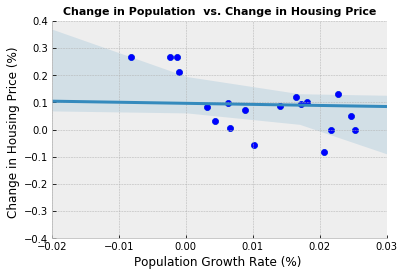

In [83]:
fig, ax = plt.subplots()

sns.regplot(dc.Pop_Change, dc.Change_in_Housing_Price)

plt.style.use('bmh')

ax.scatter(dc.Pop_Change, dc.Change_in_Housing_Price, color = 'b', linewidth = '0.5')
ax.set_title("Change in Population  vs. Change in Housing Price", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Change in Housing Price (%) ")
ax.set_xlabel("Population Growth Rate (%) ")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim(-0.02,0.03)
ax.set_ylim(-0.4,0.4)

plt.show() #VISUALIZING LINEAR RELATIONSHIPS 

### Housing Affordability Time-Series

The line plot below displays the Housing Affordability Index over our project's 19 year period. In the couple of years preceding the mortgage bubble and crash, affordability is steadily declining in the District of Columbia. The index peaked around 2000, and has been in a slump recently, with HAI hitting its lowest level. 

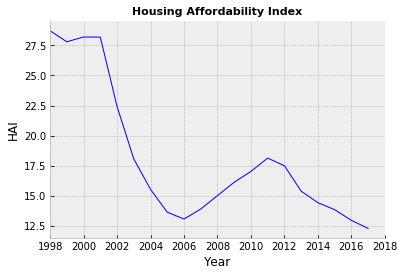

In [84]:
fig, ax = plt.subplots()

ax.plot(dc.index, dc.Housing_Affordability_Index, color = 'b', linewidth = '1')
ax.set_title("Housing Affordability Index", fontsize = 11, fontweight = "bold")
ax.set_ylabel("HAI")
ax.set_xlabel("Year")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xticks(np.arange(1998,2019,2))
ax.set_xlim(1998,2018)

plt.show()

### District of Columbia HAI Breakdown
Below, is a side-by-side breakdown of the HAI visual. It is split into the two components of the Housing Affordability Index, being income per capita and the median housing price. Incomes in the county have continued their steady rise, even through the chaos of the recession, but housing prices have had dips, especially around 2010-12 when the housing market bottomed out. This breakdown provides some more detailed insight into the HAI line plot above. 

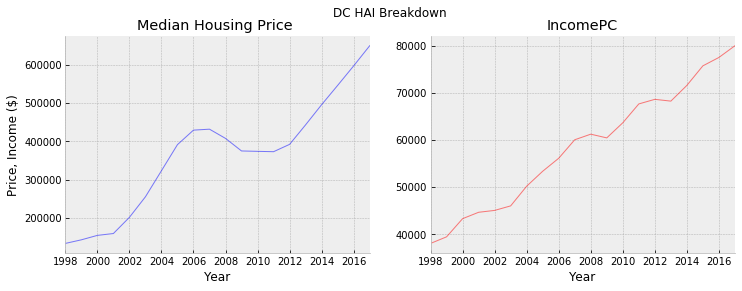

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))

plt.xticks(np.arange(1998,2019,2))
ax[0].plot(dc.index, dc.Median_Housing_Price, color = "b", linewidth = 1, 
        alpha = 0.5)

ax[1].plot(dc.index, dc.IncomePerCapita, color = "red", linewidth = 1, 
        alpha = 0.5)

ax[0].set_title("Median Housing Price ")
ax[1].set_title("IncomePC")

ax[0].set_ylabel("Price, Income ($)")



fig.suptitle("DC HAI Breakdown")

for var in ax:
    
    var.set_xlim(1998,2017)
    
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year")
    
    #var.legend(frameon = False)

plt.show()

### 10th and 90th percentile Housing Affordability Index 

Side-by-side comparison

El Paso County in Colorado is the 10th percentile in our Housing Affordability Index distribution.

In [86]:
elpaso = combo.loc['08041']
elpaso.set_index('TimePeriod',inplace = True)

In [87]:
elpaso.head()

,RegionName,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
TimePeriod,,,,,,,,
1998,El Paso County,498062,18.423680,27170,-0.507674,130825.00,-0.713019,20.77
1999,El Paso County,509044,0.022049,28697,0.056202,139091.67,0.063189,20.63
2000,El Paso County,519938,0.021401,30783,0.072691,149350.00,0.073752,20.61
2001,El Paso County,535864,0.030631,31177,0.012799,151100.00,0.011717,20.63
2002,El Paso County,544145,0.015454,31376,0.006383,174175.00,0.152713,18.01


Philadelphia County in Pennsylvania is in the 90th percentile of our Housing Affordability Index distribution.

In [88]:
philly = combo.loc['42101']
philly.set_index('TimePeriod', inplace = True)

In [89]:
philly.head()

,RegionName,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
TimePeriod,,,,,,,,
1998,Philadelphia County,1525955,32.081601,22957,-0.457358,46758.33,-0.691160,49.10
1999,Philadelphia County,1520064,-0.003861,23719,0.033192,47933.33,0.025129,49.48
2000,Philadelphia County,1514563,-0.003619,25424,0.071883,50708.33,0.057893,50.14
2001,Philadelphia County,1505455,-0.006014,25785,0.014199,49208.33,-0.029581,52.40
2002,Philadelphia County,1498493,-0.004625,26513,0.028233,58033.33,0.179340,45.69


### HAI Comparison between El Paso County and Philadelphia County

Below, we compared the housing affordability index values of both counties against each other in order to see the differences between a county that is in the 90th percentile of affordability, and one that is in the bottom 10th percentile. Both counties were negatively impacted by the recession, and they recovered equally as fast afterwards. Philly County's affordability index value has been consistently above that of El Paso County, with a peak of over 50 that it most recently hit in 2012. After that year, when the housing market turned a corner, both counties saw declines in their Housing Affordability Index, but Philly County was  more vulnerable, seeing its HAI drop more dramatic. It's interesting to see the differences in the volatility between the two counties simply based off of their history of housing affordability.   

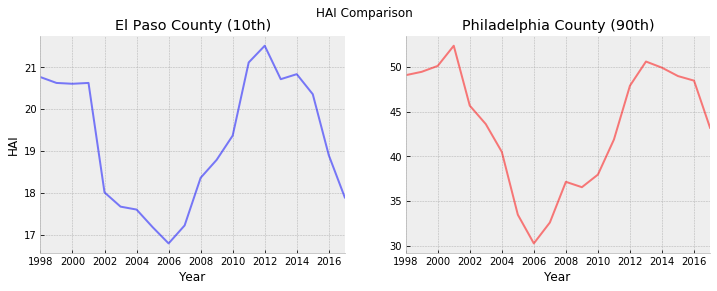

In [90]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))

plt.xticks(np.arange(1998,2019,2))
ax[0].plot(elpaso.index, elpaso.Housing_Affordability_Index, color = "b", linewidth = 2, 
        alpha = 0.5)

ax[1].plot(philly.index, philly.Housing_Affordability_Index, color = "red", linewidth = 2, 
        alpha = 0.5)

ax[0].set_title("El Paso County (10th)")
ax[1].set_title("Philadelphia County (90th)")

ax[0].set_ylabel("HAI")


fig.suptitle("HAI Comparison")

for var in ax:
    
    var.set_xlim(1998,2017)
    #var.set_ylim(16,55)
    
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year")
    
    #var.legend(frameon = False)

plt.show()

Another perspective on the data presented above:

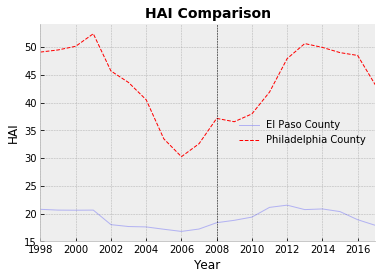

In [91]:
fig, ax = plt.subplots()


plt.xticks(np.arange(1998,2018,2))

ax.plot(elpaso.index, elpaso.Housing_Affordability_Index, color = "b", linewidth = 1, 
        alpha = 0.25, label = "El Paso County")

ax.plot(philly.index, philly.Housing_Affordability_Index, color = "r", linewidth = 1,
        linestyle = '--', label = "Philadelphia County")

ax.set_title("HAI Comparison", fontsize = 14, fontweight = "bold")
plt.axvline(x=2008, linestyle = '--', color = 'black', linewidth = '0.5')


ax.legend(frameon = False)

ax.set_ylabel("HAI")
ax.set_xlabel("Year")

ax.set_xlim(1998,2017)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.show()

### Income PC Comparison

The comparison graphs below look at any differences between IncomePC across the two counties. Although both counties start off with similar income per capita in 1998, the gap grows more apparent over time. Philadelphia County, which was in the 90th percentile for the Housing Affordability Index, sees income per capita growth that is much quicker than that experienced by El Paso County. After almost 20 years, income per capita is almost 10,000 dollars higher in Philly County compared to El Paso County, which is a sizable difference when looking at housing prices. 

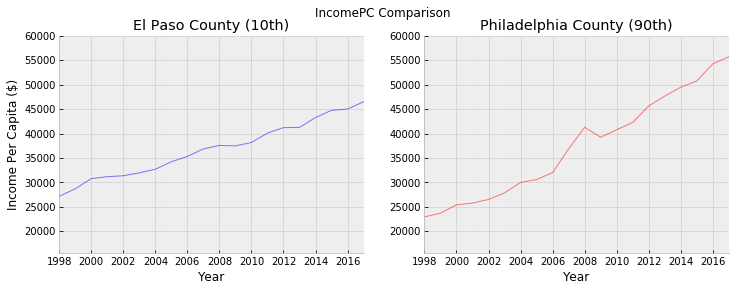

In [92]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))

plt.xticks(np.arange(1998,2019,2))
ax[0].plot(elpaso.index, elpaso.IncomePerCapita, color = "b", linewidth = 1, 
        alpha = 0.5)

ax[1].plot(philly.index, philly.IncomePerCapita, color = "red", linewidth = 1, 
        alpha = 0.5)

ax[0].set_title("El Paso County (10th)")
ax[1].set_title("Philadelphia County (90th)")

ax[0].set_ylabel("Income Per Capita ($)")


fig.suptitle("IncomePC Comparison")

for var in ax:
    
    var.set_xlim(1998,2017)
    var.set_ylim(15500,60000)
    
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year")
    
    #var.legend(frameon = False)

plt.show()

### Median Housing Price Comparison

The line plots below breakdown the HAI visual from above to focus solely on changes in median housing prices in both counties. From the graphs, we can see that the prices that homes started at are very different between El Paso and Philadelphia Counties. In El Paso, housing prices were already over 130,000 dollars in 1998, and have nearly doubled by 2017. While Philly County has seen three times that increase, its median housing prices in 2017 are still substantially lower than similar home prices in El Paso. This may speak to the desirability of both counties for people, which would cause prices to rise. Both counties saw median housing prices peak before crashing in '08, following roughly the same general trend. Philadelphia County's rapid housing price growth in recent years is worth further exploration. 

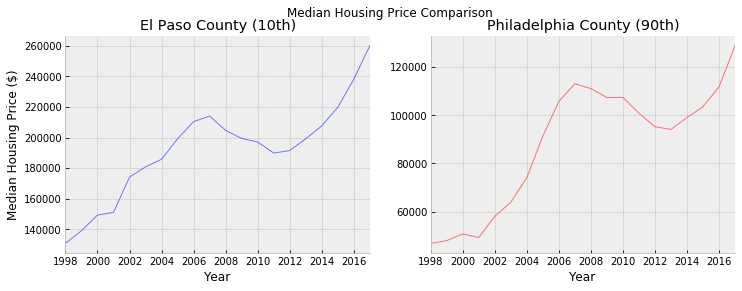

In [93]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))

plt.xticks(np.arange(1998,2019,2))
ax[0].plot(elpaso.index, elpaso.Median_Housing_Price, color = "b", linewidth = 1, 
        alpha = 0.5)

ax[1].plot(philly.index, philly.Median_Housing_Price, color = "red", linewidth = 1, 
        alpha = 0.5)

ax[0].set_title("El Paso County (10th)")
ax[1].set_title("Philadelphia County (90th)")

ax[0].set_ylabel("Median Housing Price ($)")


fig.suptitle("Median Housing Price Comparison")

for var in ax:
    
    var.set_xlim(1998,2017)
    
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel("Year")
    
    #var.legend(frameon = False)

plt.show()

We also wrote a function by which any user can, by entering a valid GeoFips code, receive a time-series of the Population change, Median Housing Price change, Income Per Capita change, or Housing Affordability Index change. It is called geo_lookup(). 

### Lookup by GeoFips

In [94]:
def geo_lookup():
    
    #user_input = input("Please enter a valid GeoFips code")
    
    try:
        user_input = input("Please enter a valid GeoFips code: ")
    except KeyError: 
        user_input = input("Please enter a valid GeoFips code: ")

                       
    new_combo = combo.loc[user_input]
    
    new_combo.set_index('TimePeriod', inplace = True)
    
    new_input = input("Please enter one of the following options: Pop, IncomePerCapita, Median_Housing_Price, Housing_Affordability_Index")
    
    if new_input == 'Pop':
        
        fig, ax = plt.subplots()

        ax.plot(new_combo.index.astype(int), new_combo.Pop, color = 'b', linewidth = '1')
        ax.set_title("Population", fontsize = 11, fontweight = "bold")
        ax.set_ylabel("Population")
        ax.set_xlabel("Year")

        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        plt.xticks(np.arange(1998,2019,2))
        ax.set_xlim(1998,2018)

    elif new_input == 'IncomePerCapita':

        fig, ax = plt.subplots()

        ax.plot(new_combo.index.astype(int), new_combo.IncomePerCapita, color = 'b', linewidth = '1')
        ax.set_title("IncomePC", fontsize = 11, fontweight = "bold")
        ax.set_ylabel("Income Per Capita ($)")
        ax.set_xlabel("Year")

        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        plt.xticks(np.arange(1998,2019,2))
        ax.set_xlim(1998,2018)
        
    elif new_input == 'Median_Housing_Price':
        
        fig, ax = plt.subplots()

        ax.plot(new_combo.index.astype(int), new_combo.Median_Housing_Price, color = 'b', linewidth = '1')
        ax.set_title("Median Housing Price", fontsize = 11, fontweight = "bold")
        ax.set_ylabel("Median Housing Price ($)")
        ax.set_xlabel("Year")

        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        plt.xticks(np.arange(1998,2019,2))
        ax.set_xlim(1998,2018)
        
    elif new_input == 'Housing_Affordability_Index':
        
        fig, ax = plt.subplots()

        ax.plot(new_combo.index.astype(int), new_combo.Housing_Affordability_Index, color = 'b', linewidth = '1')
        ax.set_title("Housing Affordability Index", fontsize = 11, fontweight = "bold")
        ax.set_ylabel("Housing Affordability Index")
        ax.set_xlabel("Year")

        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        plt.xticks(np.arange(1998,2019,2))
        ax.set_xlim(1998,2018)
        
    else: 
        new_input = input("Please enter one of the following options: Pop, IncomePerCapita, Median_Housing_Price, Housing_Affordability_Index")


### Test Case (01001 Autauga County) 

Population Time-Series

Please enter a valid GeoFips code: 01001
Please enter one of the following options: Pop, IncomePerCapita, Median_Housing_Price, Housing_Affordability_IndexPop


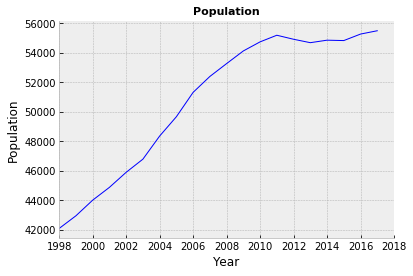

In [95]:
geo_lookup()

Income Per Capita Time-Series 

Please enter a valid GeoFips code: 01001
Please enter one of the following options: Pop, IncomePerCapita, Median_Housing_Price, Housing_Affordability_IndexIncomePerCapita


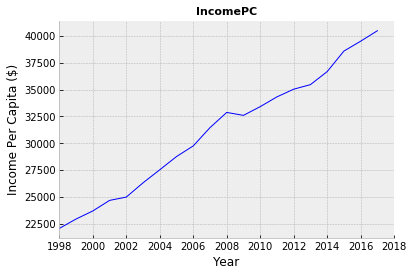

In [96]:
geo_lookup()

Median Housing Price Time-Series

Please enter a valid GeoFips code: 01001
Please enter one of the following options: Pop, IncomePerCapita, Median_Housing_Price, Housing_Affordability_IndexMedian_Housing_Price


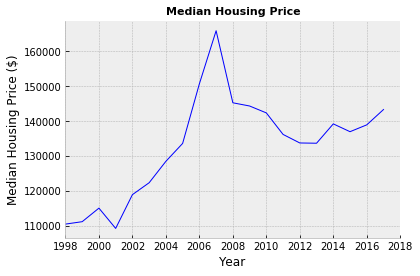

In [97]:
geo_lookup()

Housing Affordability Index Time-Series

Please enter a valid GeoFips code: 01001
Please enter one of the following options: Pop, IncomePerCapita, Median_Housing_Price, Housing_Affordability_IndexHousing_Affordability_Index


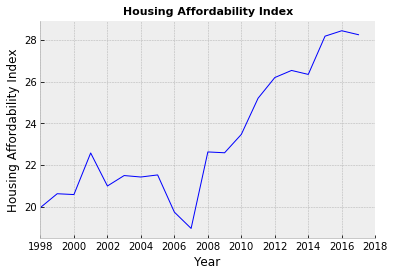

In [98]:
geo_lookup()

# Conclusion
### Final Thoughts

From this experiment, nothing particularly ground-breaking was found. It's not surprising that there is some level of relationship between the three variables we outlined in the beginning of our project, income per capita, population growth, and median housing prices. It was interesting to see in the US-wide analysis between income per capita and housing prices how a direct linear relationship seemed to exist. Given how the US has entered a rough few years where the Housing Affordability Index has dropped, but income per capita has continued to gradually improve, it's worth thinking about how housing prices (over 180,000 dollars now) have outpaced income per capita growth. This ties into many political and economic questions surrounding stagnating wage growth around the US and areas that are suffereing from lack of adequate economic opportunity. The case-by-case comparison of the 10th and 90th percentile (by HAI) of El Paso County and Philadelphia County was also very interesting to see visualized, although the insights were not extraordinary. The differences in home price volatility were especially telling as well as how the two counties absorbed the effects of the 2008 recession and rebounded afterwards. 

For more meaningful insights, data can be drawn from a wider time horizon and across a larger range of variables, beyond just the three that we tested. Many other factors contribute to a given county/area's housing prices, and many of those variables are also quantifiable in some way. Expanding the time horizon of this project to maybe 50 years may also provide more data points and make clearer any relationships between variables. A rigorous statistical analysis could also be applied to any future data exploration so that assumed relationships can be verified as statistically significant or not. It's always important to keep in mind that correlation doesn't mean causation. 

Thank you for spending the time to read this! 